<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/dcnn/Algorithums/DCNN/DCNN_Root.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install firebase-admin

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import os
from datetime import date,datetime
import json
import csv

In [3]:
dataset_path = '/content/drive/MyDrive/AYUSHVISION/working'

In [4]:
import firebase_admin

In [5]:
from firebase_admin import credentials,storage


In [6]:
from firebase_admin import firestore

In [7]:
epochs=50

In [57]:
document_id=f'{datetime.now().strftime("%Y_%m_%d_%H")}_{epochs}'
storageLocation=f'training/dcnn/root/'

In [58]:
working_dir=f'/content/drive/MyDrive/AYUSHVISION/ready/{document_id}'

# firebase

In [13]:
firebase_count=1
if firebase_count==1:
  cred = credentials.Certificate("/content/drive/MyDrive/AYUSHVISION/ServiceKey.json")
  firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})
firebase_count=firebase_count+1

In [14]:
db = firestore.client()

In [15]:
bucket = storage.bucket()

In [16]:
dcnn_ref = db.collection("training1").document('dcnn')
doc = dcnn_ref.get()

In [17]:
if not doc.exists:
  doc_ref= db.collection("training1").document('dcnn')
  doc_ref.set({'algorithum':'dcnn','version':'1','mode':'classification','url':'dcnn'})
else:
  doc_ref= dcnn_ref

### Colab

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
basicdata={'account':'mtthanu126.com','user':"Thanush"}

In [59]:
basicdata['imageSize']=[224,224]
basicdata['project']=working_dir
basicdata['name']=document_id
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='DCNN_Root'


In [19]:
basicdata['names']=os.listdir(os.path.join(dataset_path,'train'))

In [60]:
today_ref=doc_ref.collection("Root").document(document_id)

In [61]:
today_ref.set(basicdata)

update_time {
  seconds: 1725458586
  nanos: 128873000
}

In [62]:
if not os.path.exists(working_dir):
  os.makedirs(working_dir)

In [23]:
train_data_dir = f'{dataset_path}/train'
train_datagen = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 140 images belonging to 1 classes.


In [24]:
validation_data_dir = f'{dataset_path}/val'
validation_datagen = image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 20 images belonging to 1 classes.


In [25]:
test_data_dir = f'{dataset_path}/test'
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 40 images belonging to 1 classes.


In [78]:
# Build the CNN model
model=Sequential()
#Adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))
#Adding convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))
#Adding convolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))
#Adding dense layersr
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(os.listdir(os.path.join(dataset_path,'train'))),activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,399,553 (169.37 MB)

 Trainable params: 44,398,081 (169.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [80]:
args=json.loads(model.to_json())

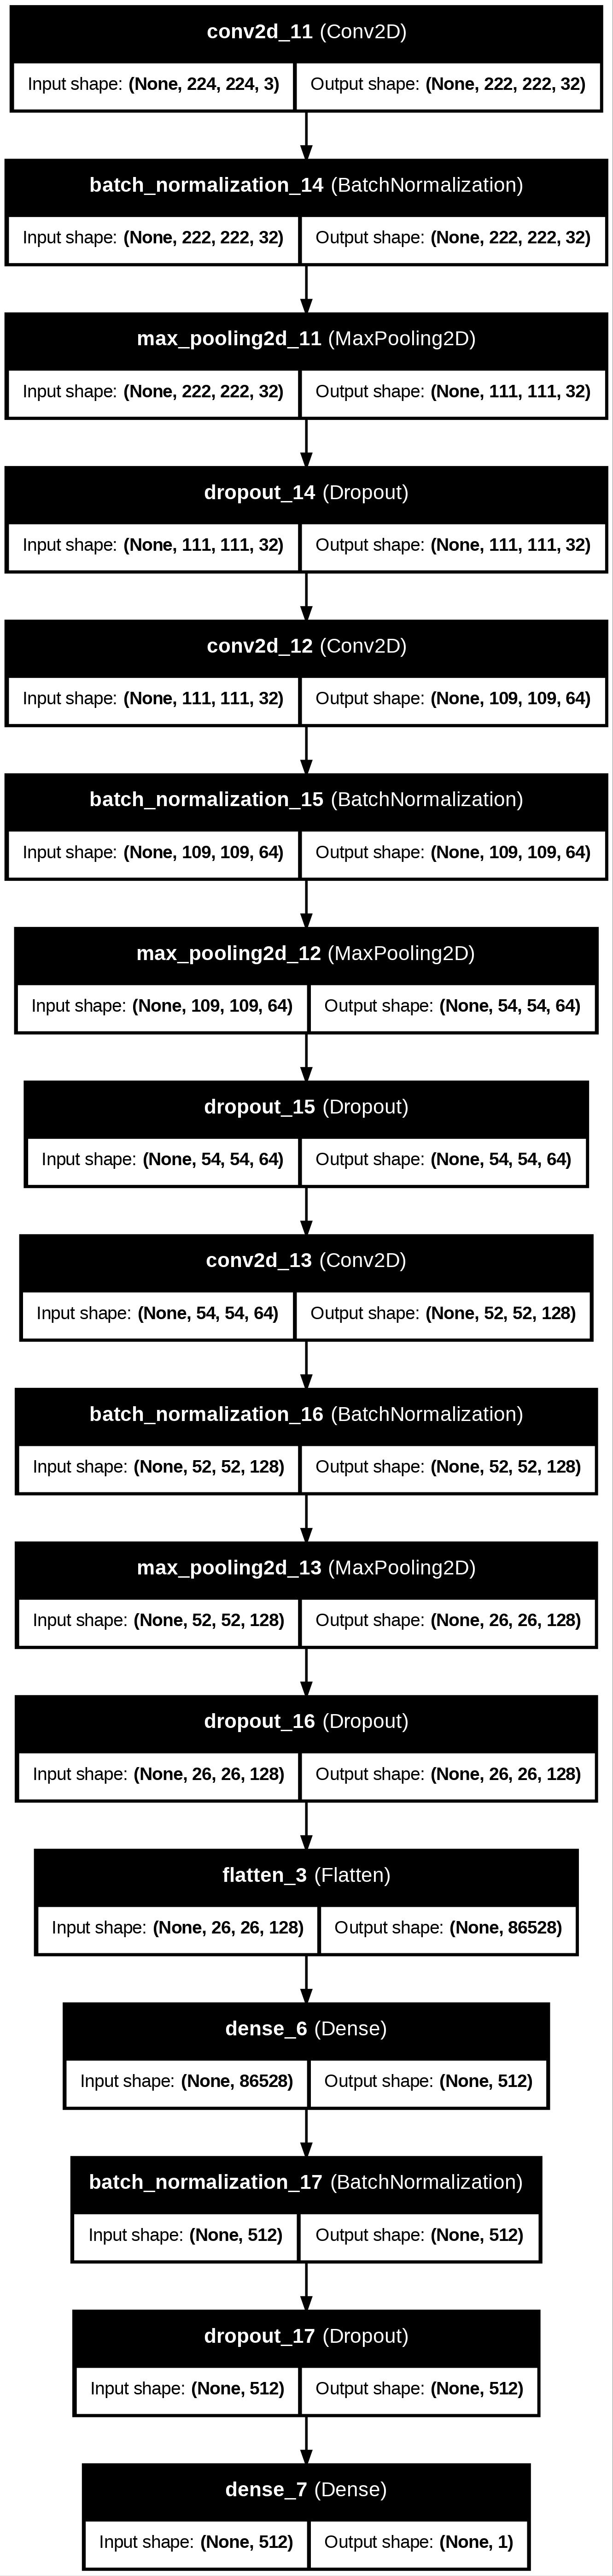

In [81]:
plot_model(model, to_file= f'{working_dir}/dcnn{epochs}.jpg' , show_shapes=True, show_layer_names=True)

In [82]:
blob = bucket.blob(f"{storageLocation+document_id}/train/model_summary{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}.jpg')
blob.make_public()

In [83]:
today_training_colref=today_ref.collection('Train')

In [84]:
today_training_ref=today_training_colref.document('args')

In [85]:
today_training_ref.set(args)

update_time {
  seconds: 1725458897
  nanos: 10813000
}

In [86]:
today_training_summary_ref=today_training_colref.document('model_summary_plot')

In [87]:
today_training_summary_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1725458903
  nanos: 96471000
}

In [88]:
# compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [89]:
todat_fit_train_ref=today_training_colref.document('fit')

In [90]:
todat_fit_train_ref.set({
    'epochs':epochs,
    'loss':"categorical_crossentropy",
    'optimizer':optimizer.get_config()

})

update_time {
  seconds: 1725458912
  nanos: 850529000
}

In [91]:
# train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 1.0000 - loss: 0.000

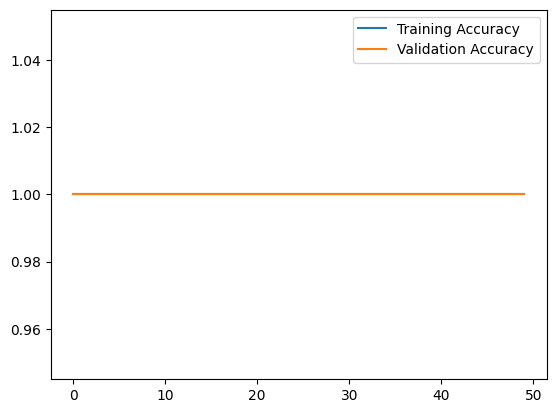

In [92]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f"{working_dir}/dcnn{epochs}_model_accuracy.jpg")
plt.show()

In [93]:
blob = bucket.blob(f"{storageLocation+document_id}/val/training_plot{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}_model_accuracy.jpg')
blob.make_public()

In [94]:
validationref=today_ref.collection('Val')

In [95]:
valhistory_ref=validationref.document('history')
valaccuracy_ref=validationref.document('accuracy_plot')

In [96]:
valhistory_ref.set(
    history.history
)

update_time {
  seconds: 1725459002
  nanos: 157528000
}

In [97]:
valaccuracy_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1725459002
  nanos: 483874000
}

In [98]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [99]:
testref=today_ref.collection('Test')

In [100]:
test_accuracy_loss=testref.document('test_accuracy_lost')
test_accuracy_loss.set({
    'accuracy':test_accuracy,
    'loss':test_loss
})

update_time {
  seconds: 1725459004
  nanos: 243942000
}

In [101]:
modelref=today_ref.collection('Model')

In [102]:
model.save(f'{working_dir}/dcnn_root_{epochs}.h5',)

In [103]:
savemodel=modelref.document('model')

In [104]:
blob = bucket.blob(f"{storageLocation+document_id}/model/dcnn_root_{epochs}.h5")
blob.upload_from_filename(f'{working_dir}/dcnn_root_{epochs}.h5')
blob.make_public()
h5model=blob.public_url

In [105]:
savemodel.set({'model':h5model})

update_time {
  seconds: 1725459062
  nanos: 314493000
}

In [54]:
directory_path = 'sample/predict'
files = os.listdir(directory_path)

for file in files:
    image_path = os.path.join(directory_path, file)

    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)


        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')


FileNotFoundError: [Errno 2] No such file or directory: 'sample/predict'